<a href="https://colab.research.google.com/github/hutchay/diabetes-prediction/blob/main/Enhanced_Midterm_Test_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction using Logistic Regression**
## **Introduction**
This notebook uses the Pima Indians Diabetes dataset to predict whether a patient has diabetes based on medical attributes. The analysis includes data preprocessing, exploratory data analysis, logistic regression modeling, and performance evaluation.
## **Dataset Description**
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration
- Blood Pressure: Diastolic blood pressure (mm Hg)
- Skin Thickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Diabetes Pedigree Function: Likelihood of diabetes based on family history
- Age: Age in years
- Outcome: Target variable (1 = Diabetes, 0 = No Diabetes)


## **Step 1: Load and Explore the Dataset**
- Load the dataset using Pandas.
- Check the first few rows.
- Display dataset information.

## **Step 2: Exploratory Data Analysis (EDA)**
- Check for missing values.
- Display summary statistics.
- Visualize correlations using heatmaps.
- Plot distributions of key features.

## **Step 3: Data Preprocessing**
- Handle missing values (if any).
- Normalize/standardize the dataset if necessary.
- Split the dataset into training and test sets.

## **Step 4: Train a Logistic Regression Model**
- Train a logistic regression model to classify diabetes presence.
- Evaluate performance using accuracy, precision, recall, and F1-score.

## **Step 5: Model Evaluation**
- Compute and visualize the confusion matrix.
- Display classification metrics including precision, recall, and F1-score.
- Discuss model performance and potential improvements.

In [4]:
"""
Using the diabetes.csv dataset, perform the following tasks:
Load the dataset.
Print first few rows of the dataset.
Print the information about columns, not-null values and datatypes.
Prepare the dataset for using Logistic Regression Model.
Using Outcome as the target variable, split the dataset into training and test sets.
Train the Logistic Regression Model for predicting the diabetes where Outcome 0 - No diabetes, 1 - Diabetes.
Evaluate the model performance using Accuracy, Precision, Recall and F1 score.
"""

'\nUsing the diabetes.csv dataset, perform the following tasks:\nLoad the dataset.\nPrint first few rows of the dataset.\nPrint the information about columns, not-null values and datatypes.\nPrepare the dataset for using Logistic Regression Model.\nUsing Outcome as the target variable, split the dataset into training and test sets.\nTrain the Logistic Regression Model for predicting the diabetes where Outcome 0 - No diabetes, 1 - Diabetes.\nEvaluate the model performance using Accuracy, Precision, Recall and F1 score.\n'

In [5]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter(action='ignore')

In [6]:
#load the dataset
import pandas as pd
df=pd.read_csv('diabetes.csv')


In [7]:
#Print first few rows of the dataset.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Print the information about columns, not-null values and datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#checking for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
#checking for duplicates
df.duplicated().sum()

0

In [11]:
#Prepare the dataset for using Logistic Regression Model.
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#Using Outcome as the target variable, split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [14]:
#Train the Logistic Regression Model for predicting the diabetes where Outcome 0 - No diabetes, 1 - Diabetes.
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
#Evaluate the model performance using Accuracy, Precision, Recall and F1 score.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



The accuracy of 0.75 shows that the model correctly predicted the outcome (diabetes or no diabetes) for 75% of the cases in the test dataset.

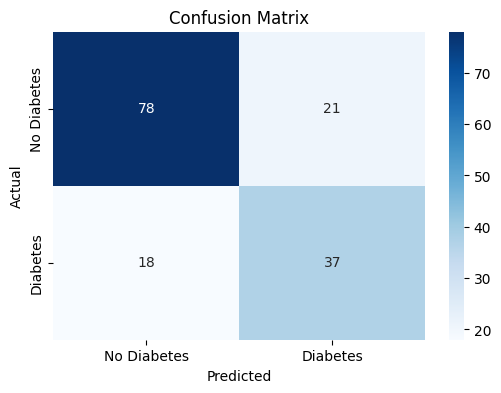

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Confusion Matrix
y_pred = model.predict(X_test)  # Assuming model is already trained
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))